## CCS stats for PacBio runs¶

This notebook summarizes ccs for pacbio runs from hashing experiments.

In [1]:
import warnings

from IPython.display import HTML, display

import alignparse
import alignparse.ccs

import pandas as pd

import plotnine as p9

In [2]:
warnings.simplefilter('ignore')

Get snakemake variables.

In [7]:
ccs_report = snakemake.input.ccs_report
ccs_fastq = snakemake.input.ccs_fastq
runs = snakemake.params.runs
summary = snakemake.output.summary

Create packbio run dataframe

In [8]:
run_df = pd.DataFrame({'name': runs, 'fastq': ccs_fastq, 'report': ccs_report})
display(HTML(run_df.to_html(index=False)))

name,fastq,report
hashing_highMOI_2020-10-20_all_segments_run1,results/pacbio/hashing_highMOI_2020-10-20_all_segments_run1_ccs.fastq.gz,results/pacbio/hashing_highMOI_2020-10-20_all_segments_run1_report.txt


In [ ]:
ccs_summaries = alignparse.ccs.Summaries(run_df)

Plot statistics for each ccs run.

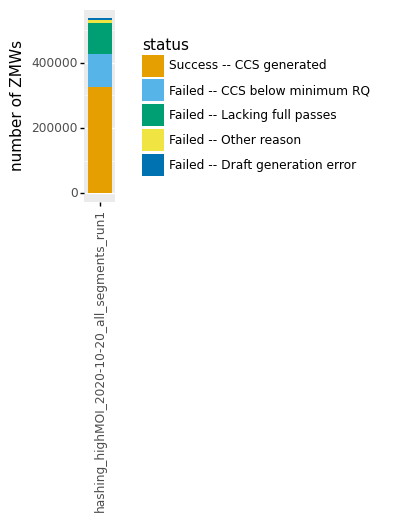

In [8]:
plot = ccs_summaries.plot_zmw_stats()
plot = plot + p9.theme(panel_grid_major_x=p9.element_blank())
_ = plot.draw()

Plot statistics on generated CCSs: their length, and accuracy (as reported by the ccs program):

No passes statistics available.


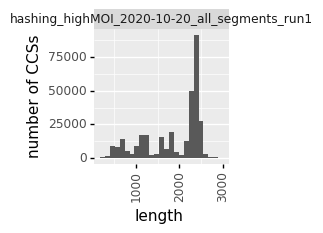

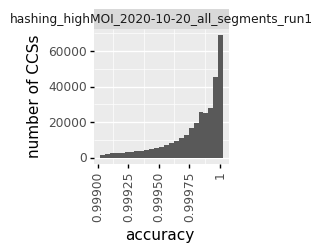

In [15]:
for variable in ['length', 'accuracy', 'passes']:
    if ccs_summaries.has_stat(variable):
        p = ccs_summaries.plot_ccs_stats(variable, maxcol=7, bins=25)
        p = p + p9.theme(panel_grid_major_x=p9.element_blank())
        _ = p.draw()
    else:
        print(f"No {variable} statistics available.")

Finally, save ccs statistics.

In [ ]:
print(f"Saving figure to {summary}")
p9.ggsave(plot=plot, filename=summary)